# Visualization

In [39]:
import pandas as pd
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from scipy.stats import pearsonr
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Load the existing data from CSV
df = pd.read_csv('articles_with_preprocessed_and_measures.csv')
df

,id,articles,highlights,preprocessed_highlights,preprocessed_articles,cosine_similarity,compression_ratio,correlation,p_value
0,1,Un biopic sur Vladimir Poutine ? Comme le vrai...,"Un biopic sur Poutine ? Oui, grâce à l'intelli...",biopic sur poutine oui grâce à lintelligence a...,biopic sur vladimir poutine comme le vrai néta...,0.243339,0.018549,0.050062,0.409141
1,2,Quatre courts métrages inédits du studio d'ani...,La suite du classique de l'animation Mon voisi...,la suite du classique lanimation mon voisin to...,quatre courts métrages inédits du studio danim...,0.359847,0.044431,0.050062,0.409141
2,3,La télévision américaine CNN a diffusé vendred...,CNN diffuse des images du rappeur Diddy frappa...,cnn diffuse des images du rappeur diddy frappa...,la télévision américaine cnn diffusé vendredi ...,0.349434,0.030659,0.050062,0.409141
3,4,"Le cinéaste iranien Mohammad Rasoulof, en lice...",Un voyage «épuisant et dangereux»: le cinéaste...,voyage épuisant et dangereux le cinéaste moham...,le cinéaste iranien mohammad rasoulof en lice ...,0.329465,0.034586,0.050062,0.409141
4,5,Cet article est extrait du Figaro Hors-série C...,Douze journées de la vie de Céline : 27 mai 18...,douze journées la vie céline 27 mai 1894 lenfa...,cet article est extrait du figaro horssérie cé...,0.212439,0.011856,0.050062,0.409141
...,...,...,...,...,...,...,...,...,...
269,270,Après avoir explosé les records avec leur trai...,"Dans Deadpool et Wolverine, Ryan et Hugh Jackm...",dans deadpool et wolverine ryan et hugh jackma...,après avoir explosé les records avec leur trai...,0.413907,0.043000,0.050062,0.409141
270,271,La Biennale de l'art africain contemporain de ...,"Dak’art, la plus importante biennale d’art afr...",dakart la plus importante biennale dart africa...,la biennale lart africain contemporain dakar d...,0.308848,0.039937,0.050062,0.409141
271,272,"Tom Cruise a été aperçu, jeudi soir, en moto, ...",Tom Cruise de retour à Paris pour le tournage ...,tom cruise retour à paris pour le tournage mis...,tom cruise été aperçu jeudi soir en moto à deu...,0.526609,0.030464,0.050062,0.409141
272,273,"Lorsque apparaît Dom Juan , le parc aux biches...",Une mise en scène d'enfer pour Dom Juan,une mise en scène denfer pour dom juan,lorsque apparaît dom juan le parc aux biches n...,0.374908,0.013005,0.050062,0.409141


## Distribution of Compression Ratios

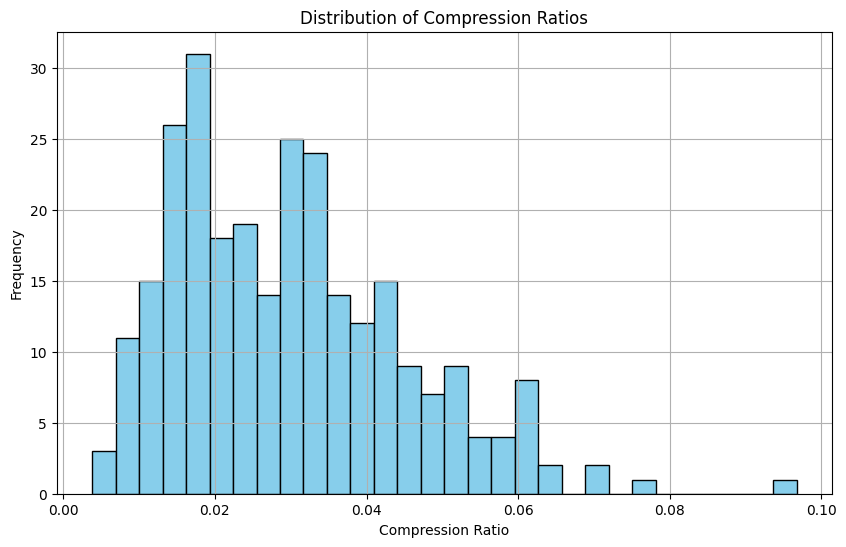

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df['compression_ratio'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Compression Ratios')
plt.xlabel('Compression Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


## Correlation between Article and HIghtlight Lengths

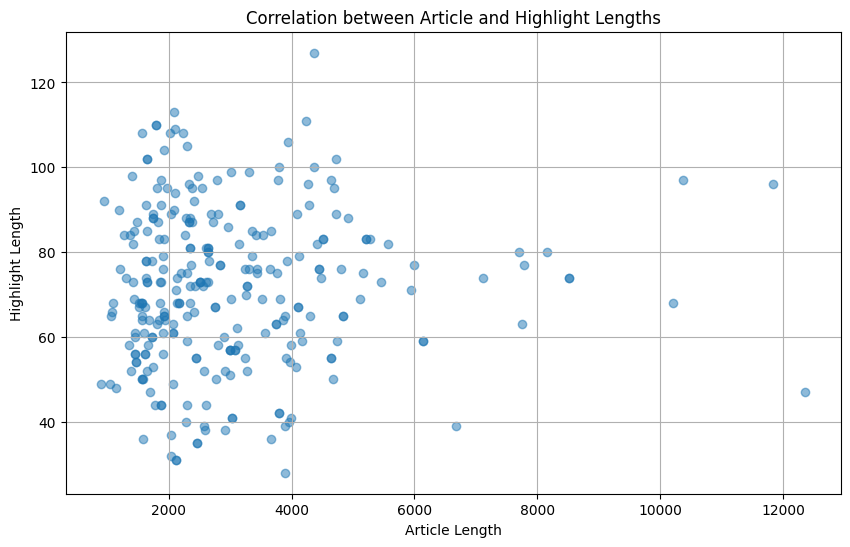

In [41]:
highlight_lengths = df['preprocessed_highlights'].apply(len)
article_lengths = df['preprocessed_articles'].apply(len)

plt.figure(figsize=(10, 6))
plt.scatter(article_lengths, highlight_lengths, alpha=0.5)
plt.title('Correlation between Article and Highlight Lengths')
plt.xlabel('Article Length')
plt.ylabel('Highlight Length')
plt.grid(True)
plt.show()


## P value

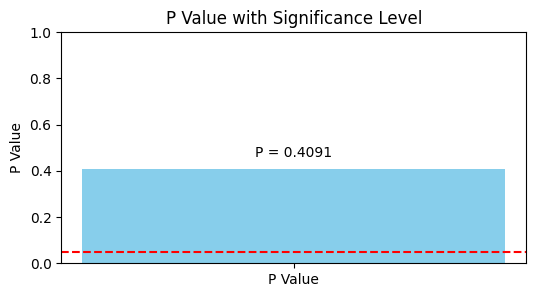

In [42]:
p_value = df['p_value'].iloc[0]

plt.figure(figsize=(6, 3))
plt.bar(['P Value'], [p_value], color='skyblue')
plt.axhline(y=0.05, color='r', linestyle='--')
plt.title('P Value with Significance Level')
plt.ylabel('P Value')
plt.ylim(0, 1)
plt.text('P Value', p_value + 0.05, f'P = {p_value:.4f}', ha='center')
plt.show()

## Cosine similarity

Although the cosine similarity measure is not very relevant to text summary, the overlapping areas in the plot shows that indicate that the content of highlights might be capturing the essence or main themes of the articles well since their vector representations are close to each other.

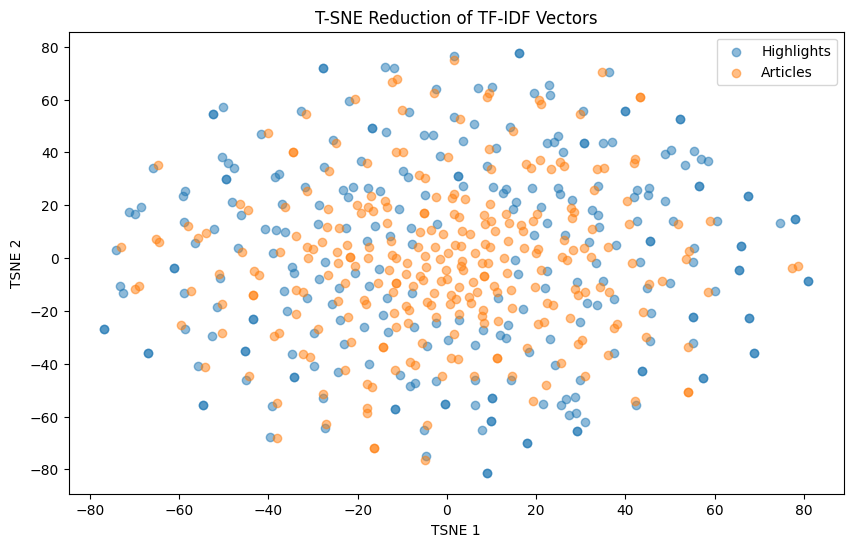

In [43]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer()

# Combine preprocessed highlights and articles for vectorization, which ensures the same features space is used for both
combined_texts = df['preprocessed_highlights'].tolist() + df['preprocessed_articles'].tolist()
tfidf_matrix = vectorizer.fit_transform(combined_texts)

# Split the TF-IDF representation into two separate matrices for highlights and articles
half_n = int(len(tfidf_matrix.toarray()) / 2)
tfidf_highlights = tfidf_matrix[:half_n]
tfidf_articles = tfidf_matrix[half_n:]

# Calculate the cosine similarity for each pair of highlight and article
cosine_similarities = [cosine_similarity(tfidf_highlights[i], tfidf_articles[i])[0][0] for i in range(half_n)]

# Add the cosine similarity to the DataFrame
df['cosine_similarity'] = cosine_similarities

# Use T-SNE to reduce dimensionality
tsne = TSNE(n_components=2, random_state=42)
tfidf_reduced = tsne.fit_transform(tfidf_matrix.toarray())

# Plotting the reduced TF-IDF vectors
plt.figure(figsize=(10, 6))
plt.scatter(tfidf_reduced[:half_n, 0], tfidf_reduced[:half_n, 1], alpha=0.5, label='Highlights')
plt.scatter(tfidf_reduced[half_n:, 0], tfidf_reduced[half_n:, 1], alpha=0.5, label='Articles')
plt.legend()
plt.title('T-SNE Reduction of TF-IDF Vectors')
plt.xlabel('TSNE 1')
plt.ylabel('TSNE 2')
plt.show()
